In [42]:
import os


In [2]:
!{sys.executable} -m pip install gitpython

zsh:1: parse error near `-m'


In [2]:
ROOT_FOLDER = "/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API"


In [32]:
from git import Repo

#Repo.clone_from("https://github.com/zeeguu-ecosystem/Zeeguu-api",ROOT_FOLDER )

In [33]:
repo = Repo(ROOT_FOLDER)

def full_path(file_name):
    return ROOT_FOLDER+file_name

In [6]:
!{sys.executable} -m pip install pathlib


zsh:1: parse error near `-m'


In [3]:
from pathlib import Path
files = []
for file in Path(ROOT_FOLDER).rglob("*.py"):
    print(file)
    files.append(file)
    
print(len(files))

/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/env_var_defs_default.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/setup.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/add_standard_topics.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/fill_historical_reading_sessions.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/migrate_starredarticle_2_userarticle.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/tag_topics_in_danish.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/bookmark_info.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/fix_bookmark_learned_status.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/exercise_analysis.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/feed_info.py
/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tools/_playground.py
/Users/loui

In [8]:
def LOC(file):
    return sum([1 for line in open(file)])

LOC(ROOT_FOLDER+'/tests/zeeguu_core_test/rules/user_rule.py')

56

In [9]:
import ast 

#def NOM(file):
 #   f = open(str(file))
  #  t = ast.parse(open(file).read())
   # return sum(isinstance(exp, ast.FunctionDef) for exp in t.body)

#NOM(ROOT_FOLDER+'/zeeguu_core/bookmark_quality/negative_qualities.py')

In [10]:
files = Path(ROOT_FOLDER).rglob("*.py")

print(max([(f,LOC(str(f))) for f in files], key= lambda x: x[1]))

(PosixPath('/Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/user.py'), 678)


In [11]:
from pathlib import Path

files_and_LOCs = []
for file in Path(ROOT_FOLDER).rglob("*.py"):
    files_and_LOCs.append((LOC(str(file)),str(file)))

files_and_LOCs.sort(key = lambda x: -x[0])
count = 0
for each in files_and_LOCs:
    if each[0] >= 200: count = count+1
    print (str(each[0]) + " " + str(each[1]))

print("More than 200 lines: " + str(count))
    


678 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/user.py
479 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_api/api/translate_and_bookmark.py
478 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/word_scheduling/arts/tools/algo_parameter_approximator.py
403 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/user_reading_session.py
354 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/bookmark.py
348 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/content_recommender/mixed_recommender.py
339 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/article.py
310 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/content_retriever/article_downloader.py
287 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/language/strategies/word_history_difficulty_estimat

In [12]:
import inspect
import importlib
import ast

class CountFunc(ast.NodeVisitor):
    func_count = 0
    def visit_FunctionDef(self, node):
        self.func_count += 1

def NOM(file):
    p = ast.parse(open(file).read())

    f = CountFunc()
    f.visit(p)

    return f.func_count
    
NOM(ROOT_FOLDER+'/zeeguu_core/bookmark_quality/negative_qualities.py')

7

In [15]:
#Prints number of methods in each file
files_and_NOMs = []
for file in Path(ROOT_FOLDER).rglob("*.py"):
    if str(file) != ROOT_FOLDER+"/tools/vis/generate-matrix-vis.py":
        files_and_NOMs.append((NOM(str(file)),str(file)))

files_and_NOMs.sort(key = lambda x: -x[0])
for each in files_and_NOMs:
    print (str(each[0]) + " " + str(each [1]))

47 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/user.py
23 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tests/zeeguu_core_test/tests_difficulty_estimator_strategies/test_flesch_kincaid_difficulty_estimator.py
22 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/bookmark.py
21 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tests/zeeguu_core_test/test_bookmark.py
20 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/article.py
20 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/tests/zeeguu_core_test/test_reading_session.py
17 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/word_scheduling/arts/tools/algo_parameter_approximator.py
17 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/user_reading_session.py
16 /Users/louiseskafte/Documents/ITU/CS/2.semester/SA/Zeeguu-API/zeeguu_core/model/user_art

In [27]:
#Number of lines in all .py files
num={}
for file in Path(ROOT_FOLDER).rglob("*.py"):
    num[file]=LOC(file)

sum(num.values())


20810

In [19]:
num={}
for file in Path(ROOT_FOLDER).rglob("*.py"):
    if str(file) != ROOT_FOLDER+"/tools/vis/generate-matrix-vis.py":
        num[file]=NOM(str(file))

sum(num.values())

1122

In [51]:
import re

def extract_import_from_line(line):
    # TODO: think about how to detect imports when
    # they are inside a function / method
    x = re.search("^import (\S+)", line) 
    x = re.search("^from (\S+)", line) 
    return x.group(1)

extract_import_from_line('from sqlalchemy import Column, ForeignKey, Integer, func')

'sqlalchemy'

In [50]:
def imports(file):
    lines = [line for line in open(file)]
    
    all_imports = []
    for line in lines:
        try:
            all_imports.append(extract_import_from_line(line))
        except:
            continue

    return all_imports

In [22]:
import ast
from collections import namedtuple

Import = namedtuple("Import", ["module", "name", "alias"])

def get_imports(path):
    with open(path) as fh:        
       root = ast.parse(fh.read(), path)

    for node in ast.iter_child_nodes(root):
        if isinstance(node, ast.Import):
            module = []
        elif isinstance(node, ast.ImportFrom):  
            module = node.module.split('.')
        else:
            continue

        for n in node.names:
            yield Import(module, n.name.split('.'), n.asname)
            
for imp in get_imports(ROOT_FOLDER+'/zeeguu_core/model/user.py'): 
    print(imp)

Import(module=[], name=['datetime'], alias=None)
Import(module=[], name=['json'], alias=None)
Import(module=[], name=['random'], alias=None)
Import(module=[], name=['re'], alias=None)
Import(module=[], name=['sqlalchemy', 'orm'], alias=None)
Import(module=[], name=['zeeguu_core'], alias=None)
Import(module=['sqlalchemy'], name=['Column'], alias=None)
Import(module=['sqlalchemy'], name=['ForeignKey'], alias=None)
Import(module=['sqlalchemy'], name=['Integer'], alias=None)
Import(module=['sqlalchemy'], name=['func'], alias=None)
Import(module=['sqlalchemy', 'orm'], name=['relationship'], alias=None)
Import(module=['sqlalchemy', 'orm', 'exc'], name=['NoResultFound'], alias=None)
Import(module=['zeeguu_core'], name=['util'], alias=None)
Import(module=['zeeguu_core'], name=['logger'], alias=None)
Import(module=['zeeguu_core', 'language', 'difficulty_estimator_factory'], name=['DifficultyEstimatorFactory'], alias=None)
Import(module=['zeeguu_core', 'model'], name=['Language'], alias=None)


In [23]:
!{sys.executable} -m pip install networkx --upgrade
!{sys.executable} -m pip install matplotlib

zsh:1: parse error near `-m'
zsh:1: parse error near `-m'


In [24]:
class GenericVisitor(ast.NodeVisitor):
    def generic_visit(self, node):
        print (type(node).__name__)
        ast.NodeVisitor.generic_visit(self, node)

In [25]:
visitor = GenericVisitor()


In [26]:
class ImportVisitor(ast.NodeVisitor):

    def visit_Import(self, import_node):
        # retrieve the name from the returned object
        # normally, there is just a single alias
        for alias in import_node.names:
            print(alias.name)
            return alias.name
        
        # allow_parser to continue 
        super(ImportVisitor, self).generic_visit(import_node)

In [27]:
ImportVisitor().visit(ast.parse(open(ROOT_FOLDER+'/zeeguu_core/model/user.py').read()))


datetime
json
random
re
sqlalchemy.orm
zeeguu_core
dateutil.relativedelta


In [38]:
import networkx as nx
import matplotlib.pyplot as plt


In [29]:
pip install decorator==5.0.7

Note: you may need to restart the kernel to use updated packages.


In [34]:
import os
def module_from_file_path(folder_prefix, full_path):
    # extracting a module from a file name
    # e.g. /Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py -> zeeguu_core.model.user
    
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace(os.sep,".")
    file_name = file_name.replace(".py","")
    return file_name

def module(full_path):
    return module_from_file_path(ROOT_FOLDER, full_path)

print(module(full_path('zeeguu_core/model/user.py')))


zeeguu_core.model.user


In [57]:

def dependencies_graph():
    files = Path(ROOT_FOLDER).rglob("*.py")

    G = nx.Graph()

    for file in files:
        m = module(str(file))
        if m not in G.nodes:
            G.add_node(m)

        for each in imports(str(file)):
            G.add_edge(m, each)

    return G

In [58]:
def top_level_module(module_name, depth=2):
    # extracts the parent of depth X 
    components = module_name.split(".")
    return ".".join(components[:depth])

In [59]:
def abstracted_to_top_level(G):
    aG = nx.Graph()
    for each in G.edges():
        aG.add_edge(top_level_module(each[0]),
                    top_level_module(each[1]))
    return aG

In [60]:
def draw_graph_with_labels(G, figsize=(10,10)):
    plt.figure(figsize=figsize)
    nx.draw(G,with_labels=True)
    plt.show()

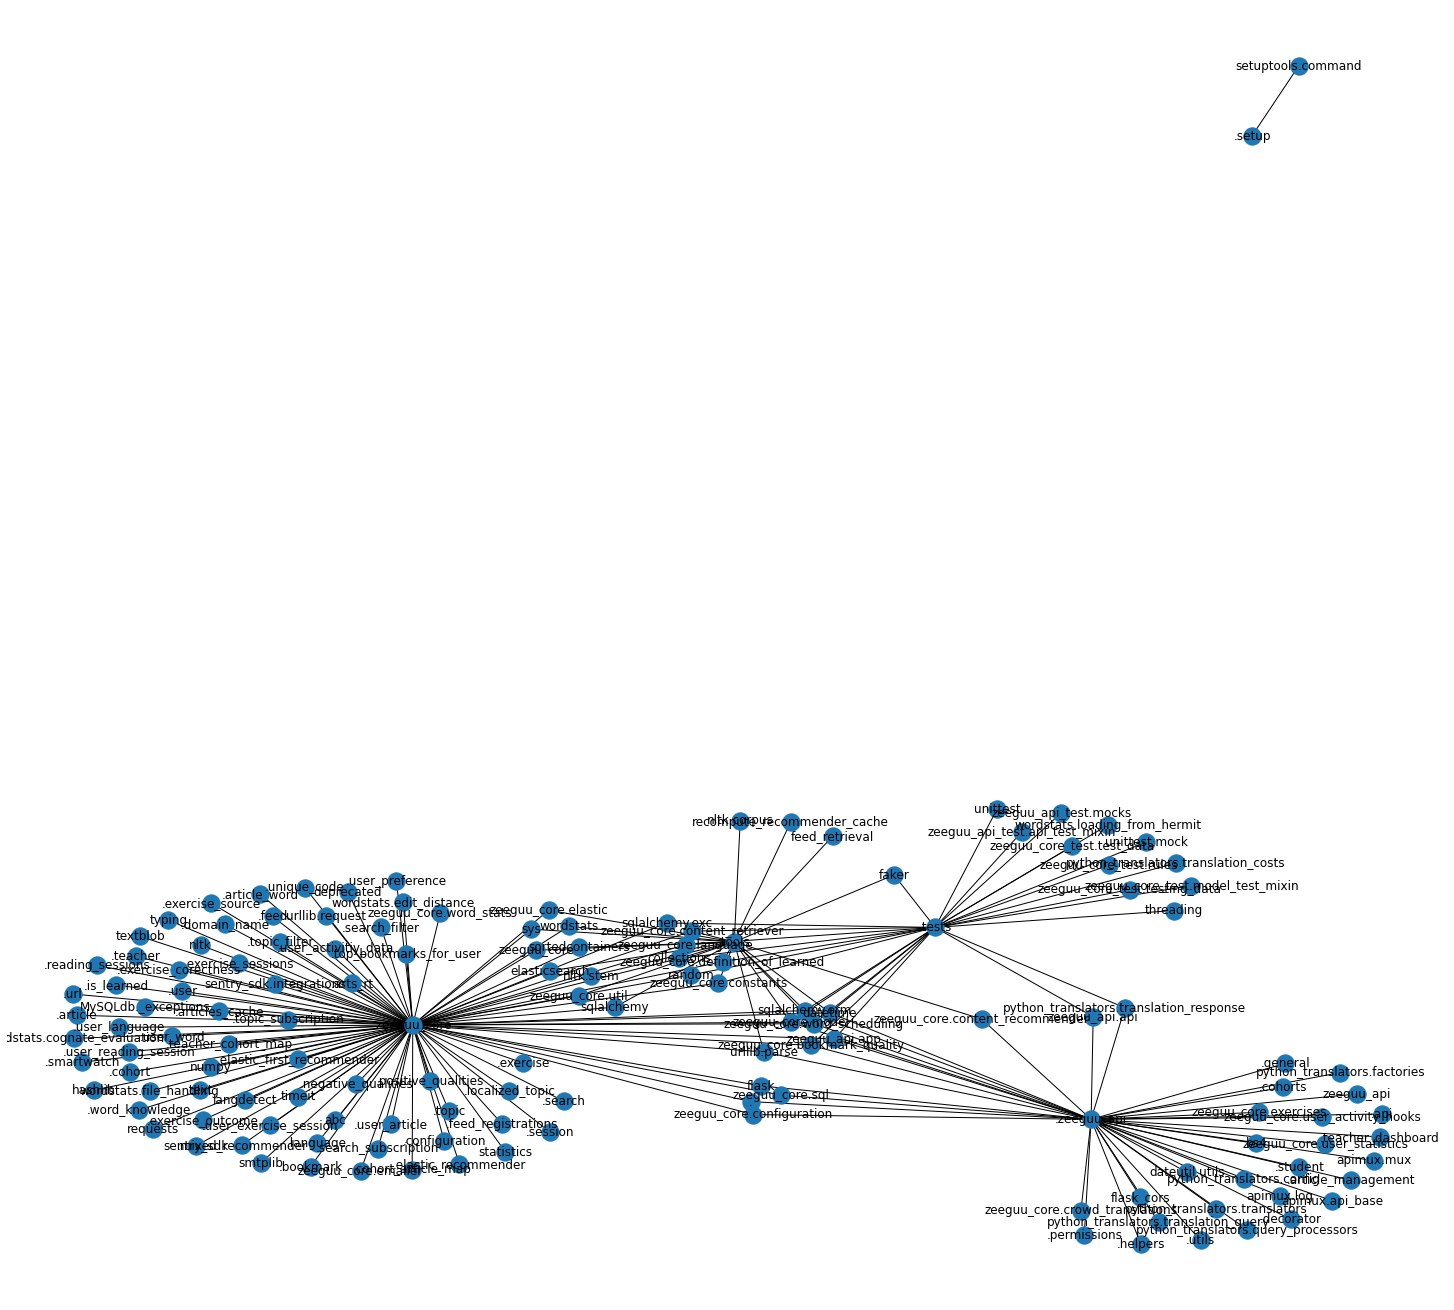

In [62]:
G = dependencies_graph()
aG = abstracted_to_top_level(G)
draw_graph_with_labels(aG, (20,18))